In [29]:
import os

In [30]:
base_dir = 'cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [25]:
from keras import models, layers, optimizers

In [67]:
network = models.Sequential()

In [68]:
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D(2, 2))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D(2, 2))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D(2, 2))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D(2, 2))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation='sigmoid'))

In [69]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [70]:
network.compile(loss='binary_crossentropy', 
                optimizer=optimizers.RMSprop(lr=1e-4), 
                metrics=['acc'])

In [52]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir, 
                                                       target_size=(150, 150), 
                                                       batch_size=20, 
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [71]:
history = network.fit_generator(train_generator, 
                                steps_per_epoch=100, 
                                epochs=30, 
                                validation_data=validation_generator, 
                                validation_steps=50)

Epoch 1/30
 38/100 [==========>...................] - ETA: 1:40 - loss: 0.6998 - acc: 0.4868

C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(

 99/100 [============================>.] - ETA: 1s - loss: 0.6938 - acc: 0.5189

C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\bin b zhu\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, le

100/100 [==============================] - 181s 2s/step - loss: 0.6942 - acc: 0.5175 - val_loss: 0.6817 - val_acc: 0.5180
Epoch 2/30
100/100 [==============================] - 178s 2s/step - loss: 0.6782 - acc: 0.5713 - val_loss: 0.6614 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 182s 2s/step - loss: 0.6711 - acc: 0.5772 - val_loss: 0.6454 - val_acc: 0.6290
Epoch 4/30
100/100 [==============================] - 180s 2s/step - loss: 0.6554 - acc: 0.6131 - val_loss: 0.6460 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 181s 2s/step - loss: 0.6366 - acc: 0.6366 - val_loss: 0.6130 - val_acc: 0.6400
Epoch 6/30
100/100 [==============================] - 181s 2s/step - loss: 0.6182 - acc: 0.6500 - val_loss: 0.5827 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 187s 2s/step - loss: 0.6163 - acc: 0.6562 - val_loss: 0.6179 - val_acc: 0.6330
Epoch 8/30
100/100 [==============================] - 180s 2s/step - loss: 0.598

In [72]:
network.save('cats_and_dogs_small_2.h5')

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [74]:
epochs = range(1, len(acc)+1)

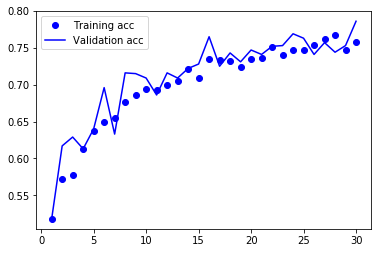

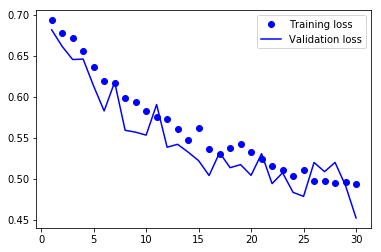

In [75]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [53]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

In [57]:
img = image.load_img('PetImages/Cat/3.jpg', target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

In [ ]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i > 4:
        break
plt.show()